In [1]:

from pathlib import Path
import pandas as pd

ANSWER_WEIGHT = {
    "Strongly disagree": -2,
    "Disagree":          -1,
    "Agree":              1,
    "Strongly agree":     2,
}

def compute_scaled_scores(responses_file: str | Path) -> tuple[float, float]:
    df = pd.read_excel(responses_file)

    econ_raw = social_raw = 0
    econ_count = social_count = 0   # hvor mange spørgsmål på hver akse

    for _, row in df.iterrows():
        # find valgte svar
        weight = next(
            (w for col, w in ANSWER_WEIGHT.items() if col in row and row[col] == 1),
            0
        )
        sign = 1 if str(row["Direction"]).strip() == "+" else -1
        contrib = weight * sign

        if str(row["Axis"]).strip().upper() == "E":
            econ_raw += contrib
            econ_count += 1
        else:
            social_raw += contrib
            social_count += 1

    # maksimalt absolut bidrag (alle svar vægt 2 i samme retning)
    econ_max = econ_count * 2 or 1   # undgå division med 0
    soc_max  = social_count * 2 or 1

    # lineær skalering til [-10, 10]
    econ_scaled = econ_raw * 10 / econ_max
    soc_scaled  = social_raw * 10 / soc_max
    return round(econ_scaled, 2), round(soc_scaled, 2)


# ----------------------------------------------------------------------
if __name__ == "__main__":
    fn = r"C:\Users\45237\OneDrive - Danmarks Tekniske Universitet\Skrivebord\Statistical analysis ML models\Spørgeskema udfyldt.xlsx"          # ← tilpas filnavn om nødvendigt
    econ, soc = compute_scaled_scores(fn)
    print(f"Economic axis (left/right) (scaled): {econ}")
    print(f"Social axis   (scaled): {soc}")


Economic axis (left/right) (scaled): -6.25
Social axis   (scaled): -7.38


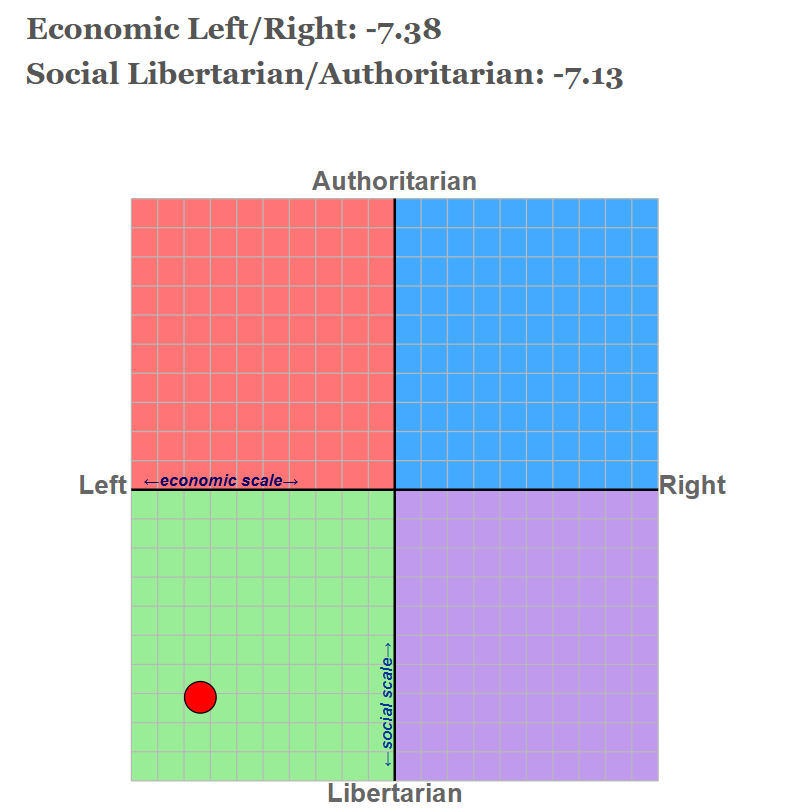

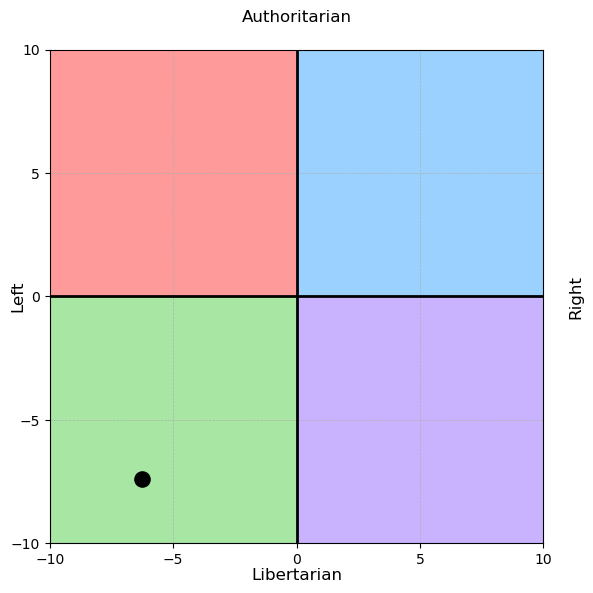

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_compass_colored(econ, social,
                         left_color="#a8e6a3",      # Libertarian-Left
                         right_color="#c9b3ff",     # Libertarian-Right
                         auth_left_color="#ff9a9a", # Authoritarian-Left
                         auth_right_color="#9ad1ff" # Authoritarian-Right
                         ):
    
    fig, ax = plt.subplots(figsize=(6, 6))

    # 1) Farvet baggrund
    quads = [
        (-10,   0, 10, 10, auth_left_color),   # Autoritær venstre
        (  0,   0, 10, 10, auth_right_color),  # Autoritær højre
        (-10, -10, 10, 10, left_color),        # Libertær venstre
        (  0, -10, 10, 10, right_color),       # Libertær højre
    ]
    for x0, y0, w, h, col in quads:
        ax.add_patch(patches.Rectangle((x0, y0), w, h, color=col, zorder=0))

    # 2) Centrale akser
    ax.axhline(0, color="black", linewidth=2, zorder=3)
    ax.axvline(0, color="black", linewidth=2, zorder=3)

    # 3) Dit punkt
    ax.scatter(econ, social, s=120, color="black", zorder=4)

    # 4) Grænser, ticks og gitter
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xticks(range(-10, 11, 5))
    ax.set_yticks(range(-10, 11, 5))
    ax.grid(True, linestyle="--", linewidth=0.5, zorder=2)

    # 5) Akse-etiketter
    ax.text(0, 11,  "Authoritarian", ha="center", va="bottom", fontsize=12)
    ax.text(0, -11, "Libertarian",   ha="center", va="top",    fontsize=12)
    ax.text(-11, 0, "Left",  ha="right", va="center", rotation=90, fontsize=12)
    ax.text( 11, 0, "Right", ha="left",  va="center", rotation=90, fontsize=12)


    ax.set_aspect("equal")
    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# EKSEMPEL – udskift med dine egne beregnede værdier
if __name__ == "__main__":
    economic_score = econ
    social_score   = soc
    plot_compass_colored(economic_score, social_score)
